<a href="https://colab.research.google.com/github/sid1336/Computational-physics/blob/main/Exercise%208%20-%20Runge-Kutta%20methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utkarsh sachdeva
<br>
Date: Mar. 6, 2024
<br>
PHYS 2030 W24

__Rubric__ (100 points total):

- Part (a) /__40 points__

- Part (b) /__30 points__

- Part (c) /__30 points__

# <center><font color=#46769B>Exercise 8: Runge-Kutta methods</font></center>

## <font color=#46769B>Introduction</font>

In Exercise 7, we considered an ideal simple pendulum consisting of a rigid rod of length $\ell$, with a mass at one end and a frictionless pivot at the other end, such that the pendulum is free to oscillate in the vertical plane under the influence of gravity, with gravitational acceleration $g$. The equation of motion is

$$\theta''(t) + \omega^2 \, \sin\theta(t) = 0 \qquad \qquad (1)$$

where $t$ is time, $\theta(t)$ is the angle of displacement from the vertical axis (where $\theta = 0$ corresponds to the pendulum oriented straight downward), and $\omega = \sqrt{g/\ell}$.

We solved the equation of motion numerically using Euler's method. We found that for small-angle displacements, our numerical solution agreed well with the simple harmonic oscillator solution, with period $T = 2\pi /\omega$, while for large-angle displacements the oscillations have a longer period.

While Euler's method is easy to implement for solving IVPs, but we saw that it had major shortcomings in terms of accuracy, requiring a large number of steps to achieve even a modest accuracy. Higher-order methods can overcome this difficulty, dramatically decreasing the number of steps needed.

The goal here to learn how to implement higher-order explicit methods, namely, RK2 methods (__midpoint method__ and __Heun's method__) and the __classic RK4 method__.

The goals of this exercise are:
- Gain experience with second-order (and higher) methods for solving ODEs

Required reading:
- *Lesson 8: Second-order methods*


## <font color=#46769B>Part (a)</font>

Starting from the equation of motion for a simple pendulum, given in Eq. (1), define three separate functions to implement three different higher-order methods (each defined using a `def` statement):

- `midpoint(num_steps,theta_0)` that will perform the midpoint method for a given initial condition `theta_0` and number of steps `num_steps`. Your function should end with
```py
    return t, y
```
that is, returning the time points `t` and numerical solution `y` that you obtained.

- `Heun(num_steps,theta_0)` that will do the same for Heun's method.

- `RK4(num_steps,theta_0)` that will do the same for the (classic) RK4 method.

For each, take a fixed interval $[0,5]$ for $t$.

Finally, perform the following tasks:

- Use your functions to solve for $\theta(t)$ vs $t$ for each of the three methods, for $N=1000$ steps and with an initial condition $\theta_0 = 1$.

- Make a plot showing $\theta(t)$ vs $t$ for all three methods. Include a legend and axes labels in your plot, and give each line its own line style (solid, dashed, and dot-dashed) using the `linestyle` keyword in `matplotlib.pyplot.plt()`. (See [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) for documentation on this.)




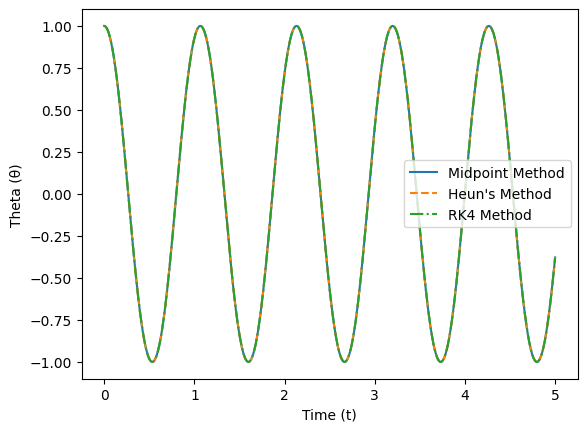

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, theta):
    # Equation of motion for a simple pendulum
    omega = 2*np.pi
    return np.array([theta[1], -omega**2 * np.sin(theta[0])])

def midpoint(num_steps, theta_0):
    t = np.linspace(0, 5, num=num_steps+1)
    h = t[1] - t[0]
    y = np.zeros((num_steps+1, 2))
    y[0] = theta_0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + 0.5*h, yi + 0.5*h*k1)

        y[i+1] = yi + h * k2

    return t, y[:, 0]

def Heun(num_steps, theta_0):
    t = np.linspace(0, 5, num=num_steps+1)
    h = t[1] - t[0]
    y = np.zeros((num_steps+1, 2))
    y[0] = theta_0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti +h, yi + h*k1)
        k = 0.5*(k1+k2)

        y[i+1] = yi + h * k
    return t, y[:, 0]

def RK4(num_steps, theta_0):
    t = np.linspace(0, 5, num=num_steps+1)
    h = t[1] - t[0]
    y = np.zeros((num_steps+1, 2))
    y[0] = theta_0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + 0.5*h, yi + 0.5*h*k1)
        k3 = f(ti + 0.5 , yi + 0.5*h*k2)
        k4 = f(ti +h , yi + h*k3)
        k = (1/6) * (k1 + 2*k2 + 2*k3 +k4)

        y[i+1] = yi + h * k
    return t, y[:, 0]


N = 1000
theta_initial = np.array([1.0, 0.0])  # [initial angle, initial angular velocity]

# Solve using three methods
t_mid, theta_mid = midpoint(N, theta_initial)
t_heun, theta_heun = Heun(N, theta_initial)
t_rk4, theta_rk4 = RK4(N, theta_initial)

# Plotting
plt.plot(t_mid, theta_mid, label='Midpoint Method', linestyle='solid')
plt.plot(t_heun, theta_heun, label="Heun's Method", linestyle='dashed')
plt.plot(t_rk4, theta_rk4, label='RK4 Method', linestyle='dashdot')

# Labeling and Legend
plt.xlabel('Time (t)')
plt.ylabel('Theta (θ)')
plt.legend()

# Show the plot
plt.show()

## <font color=#46769B>Part (b)</font>

In Exercise 7, Euler's method required about $N \sim 10^7$ steps to converge for an initial condition $\theta_0 = 3$, with tolerance settings `atol = rtol = 1e-2`.

Using your code from Part (a), determine the number of steps $N$ needed for each of the midpoint, Heun, and RK4 methods to converge within the same tolerance, for the same initial displacement.  Make a plot of your final converged results for each method.

Not converged yet. Trying 2000 steps.
Not converged yet. Trying 4000 steps.
Midpoint method converged with 4000 steps.
Not converged yet. Trying 2000 steps.
Not converged yet. Trying 4000 steps.
Heun method converged with 4000 steps.
Not converged yet. Trying 2000 steps.
RK4 method converged with 2000 steps.
Final steps of the solution:
[4.9775 4.98   4.9825 4.985  4.9875 4.99   4.9925 4.995  4.9975 5.    ] [[2.91724738 1.0901833 ]
 [2.91994551 1.06835685]
 [2.92258938 1.04678757]
 [2.92517965 1.0254704 ]
 [2.92771694 1.00440037]
 [2.93020186 0.98357251]
 [2.932635   0.96298195]
 [2.93501696 0.94262382]
 [2.93734831 0.92249334]
 [2.93962961 0.90258575]]


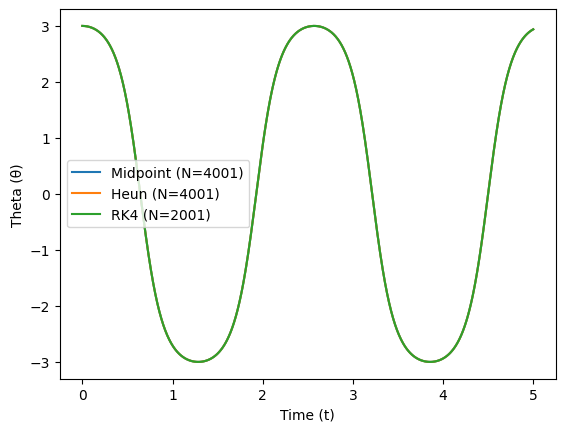

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function f(t, y)
def f(ti, yi):
    y1, y2 = yi
    omega = 2 * np.pi
    return np.array([y2, -omega**2 * np.sin(y1)])

# Define boundary conditions
t0 = 0
tf = 5

# Define each method
def midpoint(steps, theta_0):
    t = np.linspace(t0, tf, num=steps+1)
    h = t[1] - t[0]
    y = np.zeros((steps+1, 2))
    y[0] = theta_0

    for i in range(steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + 0.5*h, yi + 0.5*h*k1)

        y[i+1] = yi + h * k2

    return t, y

def Heun(steps, theta_0):
    t = np.linspace(t0, tf, num=steps+1)
    h = t[1] - t[0]
    y = np.zeros((steps+1, 2))
    y[0] = theta_0

    for i in range(steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + h, yi + h*k1)
        k = 0.5 * (k1 + k2)

        y[i+1] = yi + h * k

    return t, y

def RK4(steps, theta_0):
    t = np.linspace(t0, tf, num=steps+1)
    h = t[1] - t[0]
    y = np.zeros((steps+1, 2))
    y[0] = theta_0

    for i in range(steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + 0.5*h, yi + 0.5*h*k1)
        k3 = f(ti + 0.5*h, yi + 0.5*h*k2)
        k4 = f(ti + h, yi + h*k3)
        k = (1/6) * (k1 + 2*k2 + 2*k3 + k4)

        y[i+1] = yi + h * k

    return t, y

# Convergence-checking logic
methods = [midpoint, Heun, RK4]
method_names = ["Midpoint", "Heun", "RK4"]
results = {}

for method, name in zip(methods, method_names):
    num_steps = 1000
    theta_0 = np.array([3, 0])
    t_old, y_old = method(num_steps, theta_0)
    converged = False

    while not(converged):
        num_steps = 2 * num_steps
        print("Not converged yet. Trying", num_steps, "steps.")

        t, y_new = method(num_steps, theta_0)
        converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-2)
        y_old = y_new

    print(f"{name} method converged with {num_steps} steps.")
    results[name] = (t, y_new)

# Now, results dictionary contains the converged solutions for each method

# Plotting
for name, (t, y) in results.items():
    plt.plot(t, y[:, 0], label=f'{name} (N={len(t)})')
print("Final steps of the solution:")
print(t[-10:], y[-10:])
# Labeling and Legend
plt.xlabel('Time (t)')
plt.ylabel('Theta (θ)')
plt.legend()
plt.show()

## <font color=#46769B>Part (c)</font>

One of the drawbacks of Runge-Kutta methods is that conservation laws, such as energy or angular momentum conservation, are not exact but only hold at a given level of numerical accuracy, depending on the step size $h$ and the order of the method. That is, the local error incurred with each time step also incurs a violation of conservation laws, which grows with each time step.

In this problem, we will see how the energy of a pendulum, which we expect to be constant, is in fact not constant in time.

First, let's clarify what the energy $E$ is here. Note that the kinetic energy of the pendulum is

$$T = \frac{1}{2} m v^2 = \frac{1}{2} m \ell^2 {\theta'}^2 \, $$

where $\ell$ is the length of the pendulum arm and $m$ is the mass of the bob. The potential energy of the pendulum is

$$U = m g h = m g \ell(1-\cos\theta) = m \ell^2 \omega^2 (1-\cos\theta) \, .$$

Since we don't care about the overall factor of $m \ell^2$, let's set $m\ell^2 = 1$. Therefore the energy is

$$E = T + U = \frac{1}{2} {\theta^\prime}^2 + \omega^2 (1- \cos\theta) \, .$$

Note that the expected exact energy $E_{\rm exact}$ can be calculated by evaluating $E$ at the initial condition. Since energy should be conserved, this is the expected energy at all times.

Your tasks are as follows:

- Solve Eq. (1) for the initial condition $\theta(0) = 1$ and $\theta^\prime(0) = 0$, for the time interval $[0,1000]$ and a step-size $h=0.01$, using Euler's method (also known as RK1), the midpoint method and Heun's method (RK2 methods), and classic RK4.

- Make a log-log plot of the absolute energy difference $\Delta E = |E - E_{\rm exact}|$ vs $t$ for all four methods on a single plot. Include axis labels and a legend.




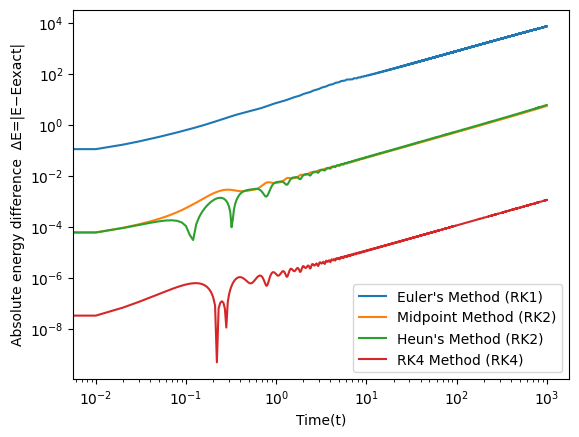

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Global constant
omega = 2 * np.pi  # Angular frequency

# Define the equation of motion
def f(t, theta):
    return np.array([theta[1], -omega**2 * np.sin(theta[0])])

# Calculate the energy at a given state (theta, theta')
def calculate_energy(theta_prime, theta):
    kinetic_energy = 0.5 * theta_prime**2
    potential_energy = omega**2 * (1 - np.cos(theta))
    return kinetic_energy + potential_energy

# Euler's method (RK1)
def euler_method(steps, theta_0):
    t = np.linspace(0, 1000, num=steps+1)
    h = t[1] - t[0]
    y = np.zeros((steps+1, 2))
    y[0] = theta_0

    energy_exact = calculate_energy(y[0, 1], y[0, 0])
    energy_difference = []

    for i in range(steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        y[i+1] = yi + h * k1

        energy_numerical = calculate_energy(y[i+1, 1], y[i+1, 0])
        energy_difference.append(np.abs(energy_numerical - energy_exact))

    return t[:-1], energy_difference

# Midpoint method (RK2)
def midpoint(steps, theta_0):
    t = np.linspace(0, 1000, num=steps+1)
    h = t[1] - t[0]
    y = np.zeros((steps+1, 2))
    y[0] = theta_0

    energy_exact = calculate_energy(y[0, 1], y[0, 0])
    energy_difference = []

    for i in range(steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + 0.5*h, yi + 0.5*h*k1)

        y[i+1] = yi + h * k2

        energy_numerical = calculate_energy(y[i+1, 1], y[i+1, 0])
        energy_difference.append(np.abs(energy_numerical - energy_exact))

    return t[:-1], energy_difference

# Heun's method (RK2)
def Heun(steps, theta_0):
    t = np.linspace(0, 1000, num=steps+1)
    h = t[1] - t[0]
    y = np.zeros((steps+1, 2))
    y[0] = theta_0

    energy_exact = calculate_energy(y[0, 1], y[0, 0])
    energy_difference = []

    for i in range(steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + h, yi + h*k1)
        k = 0.5 * (k1 + k2)

        y[i+1] = yi + h * k

        energy_numerical = calculate_energy(y[i+1, 1], y[i+1, 0])
        energy_difference.append(np.abs(energy_numerical - energy_exact))

    return t[:-1], energy_difference

# RK4 method (RK4)
def RK4(steps, theta_0):
    t = np.linspace(0, 1000, num=steps+1)
    h = t[1] - t[0]
    y = np.zeros((steps+1, 2))
    y[0] = theta_0

    energy_exact = calculate_energy(y[0, 1], y[0, 0])
    energy_difference = []

    for i in range(steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + 0.5*h, yi + 0.5*h*k1)
        k3 = f(ti + 0.5*h, yi + 0.5*h*k2)
        k4 = f(ti + h, yi + h*k3)
        k = (1/6) * (k1 + 2*k2 + 2*k3 + k4)

        y[i+1] = yi + h * k

        energy_numerical = calculate_energy(y[i+1, 1], y[i+1, 0])
        energy_difference.append(np.abs(energy_numerical - energy_exact))

    return t[:-1], energy_difference

# Solve using the four methods
N = 100000
theta_initial = np.array([1.0, 0.0])  # [initial angle, initial angular velocity]

# Calculate energy differences for each method
t_euler, energy_diff_euler = euler_method(N, theta_initial)
t_midpoint, energy_diff_midpoint = midpoint(N, theta_initial)
t_heun, energy_diff_heun = Heun(N, theta_initial)
t_rk4, energy_diff_rk4 = RK4(N, theta_initial)

# Plotting
plt.loglog(t_euler, energy_diff_euler, label="Euler's Method (RK1)")
plt.loglog(t_midpoint, energy_diff_midpoint, label="Midpoint Method (RK2)")
plt.loglog(t_heun, energy_diff_heun, label="Heun's Method (RK2)")
plt.loglog(t_rk4, energy_diff_rk4, label="RK4 Method (RK4)")

#labels.

plt.xlabel('Time(t)')
plt.ylabel('Absolute energy difference  ΔE=|E−Eexact|')
plt.legend()
plt.show()